<h2><font color="#004D7F" size=6>Módulo Supervised Learning</font></h2>



<h1><font color="#004D7F" size=5>Impacto del Covid en las Industrias</font></h1>

<br><br>
<div style="text-align: right">

<font color="#004D7F" size=3>Autor: Camila Saenz Velasquez</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [2.1. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del dataset](#section21)
    * [2.2. Visualización de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
    * [2.4. Distribución de clase](#section24)
    * [2.5. Tipo de datos](#section25)
* [3. Visualización del dataset](#section3)
    * [3.1. Gráficos Univariado](#section31)
    * [3.2. Gráficos multivariados](#section32)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Evaluación de línea base](#section42)
    * [4.3. Evaluar modelos: estandarización](#section43)
    * [4.4. Feature Selection](#section44)
        * [4.4.1 Matriz de Correlación de Variables](#section441)
        * [4.4.2 Ranking de Importancia de Variables](#section442)
        * [4.4.3 Gini de Variables](#section443)
    * [4.5. Tratamiento de Outliers y Creación de Variables Dummy](#section45)
        * [4.5.1 Rango Intercuartílico](#section451)
        * [4.5.2 Puntuación Z](#section452)
        * [4.5.3 Imputación de Cotas a Outliers](#section453)
        * [4.5.4 Creación de Variables Dummy](#section454)
    * [4.6. Normalización de Variables](#section46)
        * [4.6.1 Normalización Min-Max](#section461)
        * [4.6.2 Gráfico de la Distribución de Variables](#section462)
        * [4.6.3 Transformación de Yeo-Johnson](#section463)
* [5. Fase de Optimización](#section5)
    * [5.1. Optimización de k-NN](#section51)
    * [5.2. Optimización de SVM](#section52)
* [6. Agoritmos ensamblados](#section6)
* [7. Fase de forecasting](#section7)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


El enfoque de este proyecto será el conjunto de datos [Impacto Covid en las Industrias]. El problema consiste en predecir si las empresas han sido impactadas por el Covid mediante algunas variables como "Sector", "Deuda", "Venta", entre otras; con esas variables se va a calcular la clase o variable de salida "Impactado". La etiqueta asociada al impacto es 1, no impacto es 0.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

Primero se instala lo necesario para poder trabajar con las librerías que se importarán

In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install imblearn  

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load libraries
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import missingno as msno

from catboost import CatBoostClassifier
from sklearn import preprocessing
import warnings
import re
import gc

warnings.filterwarnings('ignore')

In [3]:
pip install numexpr 2.7.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement 2.7.0 (from versions: none)
ERROR: No matching distribution found for 2.7.0


<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

El conjunto de datos a trabajar se encuentra en la misma carpeta de trabajo que el archivo de Python del proyecto.

In [3]:
# Load dataset
mainpath = "C:/Users/Camila Saenz/Downloads/TAREAS/SUPERVISED LEARNING/"
filename = "Data_cov.csv"
df = pd.read_csv(filename, sep = ";", encoding = 'ansi') #, index_col="key_value")

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Ahora es el momento de estudiar nuestros datos. En este paso vamos a explorar nuestros datos de diferentes maneras:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Desglosar las instancias en cada clase.
* Tipo de atributos

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos o variables (columnas) hay en nuestro conjunto de datos con la propiedad `shape`. 

In [5]:
# shape
df.shape

(1998, 19)

Puede verse 1998 instancias y 19 atributos (incluyendo la clase).

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

Vamos a ver como están representados los datos con la función `head()`

In [6]:
# head
pd.set_option('display.width', 100)
df.head(5)

,Sector,Dep,Impactado,Saldo,Desembolso_mes,Saldo Promedio,"Deuda Sistea,",Pasivo,Turismo,Sector de Impacto,Venta,Venta Formal,Pasivo_desembolso,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,pasivo rezagada vr,Pasivo_desembolso da,Pasivo_desembolso dr
0,INDUSTRIA,Lima,0,56643.10092,0.0,28321.55046,31365.73,5876.82,0,3,108400.0,43741.08,5876.82,-800.65,-0.024891,830.82,0.164649,830.82,0.164649
1,COMERCIO,Arequipa,0,190313.99460,0.0,63437.99818,64864.99,4467.40,0,4,105300.0,69737.17,4467.40,-2810.52,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896
2,SERVICIO,Amazonas,0,547601.57360,0.0,182533.85790,200239.32,5000.92,0,1,86600.0,79178.83,5000.92,653.68,0.003275,2000.92,0.666973,2000.92,0.666973
3,INDUSTRIA,Lima,0,283914.20840,0.0,94638.06947,112945.17,325.50,0,3,103000.0,0.00,325.50,14820.77,0.151041,-17128.30,-0.981351,-17128.30,-0.981351
4,COMERCIO,Cusco,0,142296.43840,0.0,47432.14612,144877.21,0.00,0,4,172920.0,171999.33,0.00,17468.60,0.137107,-2071.80,-1.000000,-2071.80,-1.000000


Podemos ver las primeras 5 filas de los datos y todas las columnas.

Explorando los datos gráficamente

No hay valores perdidos, todas las columnas tienen la misma cantidad de datos.

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

En este caso podemos echar un vistazo a un resumen de cada atributo con la función `describe()`. Esto incluye la media, los valores mínimo y máximo, así como algunos percentiles.

In [5]:
# descriptions
pd.set_option('precision', 3)
df.describe()

,Impactado,Saldo,Desembolso_mes,Saldo Promedio,"Deuda Sistea,",Pasivo,Turismo,Sector de Impacto,Venta,Venta Formal,Pasivo_desembolso,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,pasivo rezagada vr,Pasivo_desembolso da,Pasivo_desembolso dr
count,1998.0,1.998e+03,1998.000,1.998e+03,1.998e+03,1.998e+03,1998.000,1998.000,1.998e+03,1.998e+03,1.998e+03,1998.000,1998.000,1.998e+03,1998.000,1.998e+03,1998.000
mean,0.5,4.804e+05,298.122,1.617e+05,2.484e+05,2.418e+04,0.055,3.050,1.003e+05,3.855e+04,2.387e+04,-3084.037,0.028,-1.743e+04,852.140,-1.478e+04,852.447
std,0.5,6.506e+05,6688.538,2.186e+05,2.893e+05,1.073e+05,0.228,0.935,1.184e+05,9.858e+04,1.070e+05,48407.921,0.545,9.419e+04,21057.347,8.636e+04,21057.339
min,0.0,1.107e+02,0.000,5.536e+01,0.000e+00,0.000e+00,0.000,1.000,2.100e+03,0.000e+00,-5.285e+03,-800000.000,-1.000,-2.265e+06,-1.000,-2.265e+06,-8.786
25%,0.0,1.153e+05,0.000,3.870e+04,7.552e+04,7.715e+02,0.000,3.000,4.112e+04,3.166e+03,7.637e+02,-6662.140,-0.042,-8.494e+03,-0.739,-7.518e+03,-0.739
50%,0.5,2.442e+05,0.000,8.222e+04,1.540e+05,2.558e+03,0.000,3.000,6.950e+04,8.333e+03,2.529e+03,-2179.090,-0.014,-3.174e+03,-0.551,-2.548e+03,-0.543
75%,1.0,5.262e+05,0.000,1.774e+05,2.899e+05,5.988e+03,0.000,4.000,1.100e+05,3.240e+04,5.963e+03,300.135,0.003,-3.035e+02,-0.296,-1.293e+02,-0.291
max,1.0,4.803e+06,169166.864,1.601e+06,2.515e+06,1.939e+06,1.000,4.000,1.599e+06,2.051e+06,1.939e+06,866562.470,13.463,9.418e+05,851658.721,9.418e+05,851658.721


<a id="section24"></a>
## <font color="#004D7F"> 2.4. Distribución de clase</font>

Finalmente, veamos ahora la cantidad de instancias (filas) que pertenecen a cada clase. con la función `groupby('Impactado').size()`

In [6]:
# class distribution
df.groupby("Impactado").size()

Impactado
0    999
1    999
dtype: int64

Podemos ver que cada clase se encuentra balanceada, por lo que no necesita tratamiento para clases desbalanceadas.

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Tipo de datos</font>

Finalmente, veamos el tipo de variable de cada atributo con la propiedad `dtypes`.

In [7]:
# types
df.dtypes

Sector                   object
Dep                      object
Impactado                 int64
Saldo                   float64
Desembolso_mes          float64
Saldo Promedio          float64
Deuda Sistea,           float64
Pasivo                  float64
Turismo                   int64
Sector de Impacto         int64
Venta                   float64
Venta Formal            float64
Pasivo_desembolso       float64
Deuda rezagada va       float64
Deuda rezagada vr       float64
pasivo rezagada va      float64
pasivo rezagada vr      float64
Pasivo_desembolso da    float64
Pasivo_desembolso dr    float64
dtype: object

Vemos que hay atributos categóricos(object) numéricos (flotantes e int) y que el valor de la clase se ha leído como un entero(int).<br>
También apreciamos que "Turismo" y "Sector de Impacto" son variables categóricas con tipo de datos entero, luego se hará tratamiento para cambiarles el tipo a categóricos.

In [11]:
df.Sector.unique()

array(['INDUSTRIA', 'COMERCIO', 'SERVICIO'], dtype=object)

Categorizamos la variable Sector en 1, 2 y 3 para poder trabajarla. Vamos a categorizar también "Sector", "Sector de Impacto" y "Turismo" ya que son enteros.

In [12]:
#Guardamos el dataset original
df2 = df

df2["Sector"] = np.where(df2["Sector"]=="INDUSTRIA", "1", df2["Sector"])
df2["Sector"] = np.where(df2["Sector"]=="COMERCIO", "2", df2["Sector"])
df2["Sector"] = np.where(df2["Sector"]=="SERVICIO", "3", df2["Sector"])
df2.Sector = df2.Sector.astype("category")
df2["Sector de Impacto"] = df2["Sector de Impacto"].astype("category",copy=False)
df2.Turismo = df2.Turismo.astype("category")

<a id="section311"></a>
### <font color="#004D7F"> Valores NaN</font>
Vamos a explorar nuestros datos para ver si tenemos valores NaN. En nuestro caso podemos observar que no tenemos ningún valor NaN en las características.

In [13]:
#numero de missing por columnas
df.isnull().sum()

Sector                  0
Dep                     0
Impactado               0
Saldo                   0
Desembolso_mes          0
Saldo Promedio          0
Deuda Sistea,           0
Pasivo                  0
Turismo                 0
Sector de Impacto       0
Venta                   0
Venta Formal            0
Pasivo_desembolso       0
Deuda rezagada va       0
Deuda rezagada vr       0
pasivo rezagada va      0
pasivo rezagada vr      0
Pasivo_desembolso da    0
Pasivo_desembolso dr    0
dtype: int64

In [11]:
#metodo visual para ver que columnas contienen algún missing
df.isnull().any()

Sector                  False
Dep                     False
Impactado               False
Saldo                   False
Desembolso_mes          False
Saldo Promedio          False
Deuda Sistea,           False
Pasivo                  False
Turismo                 False
Sector de Impacto       False
Venta                   False
Venta Formal            False
Pasivo_desembolso       False
Deuda rezagada va       False
Deuda rezagada vr       False
pasivo rezagada va      False
pasivo rezagada vr      False
Pasivo_desembolso da    False
Pasivo_desembolso dr    False
dtype: bool

In [12]:
#Columnas con missing
null_columns=df.columns[df.isnull().any()]
print(null_columns)

Index([], dtype='object')


Veamos los valores NaN gráficamente.

<AxesSubplot:>

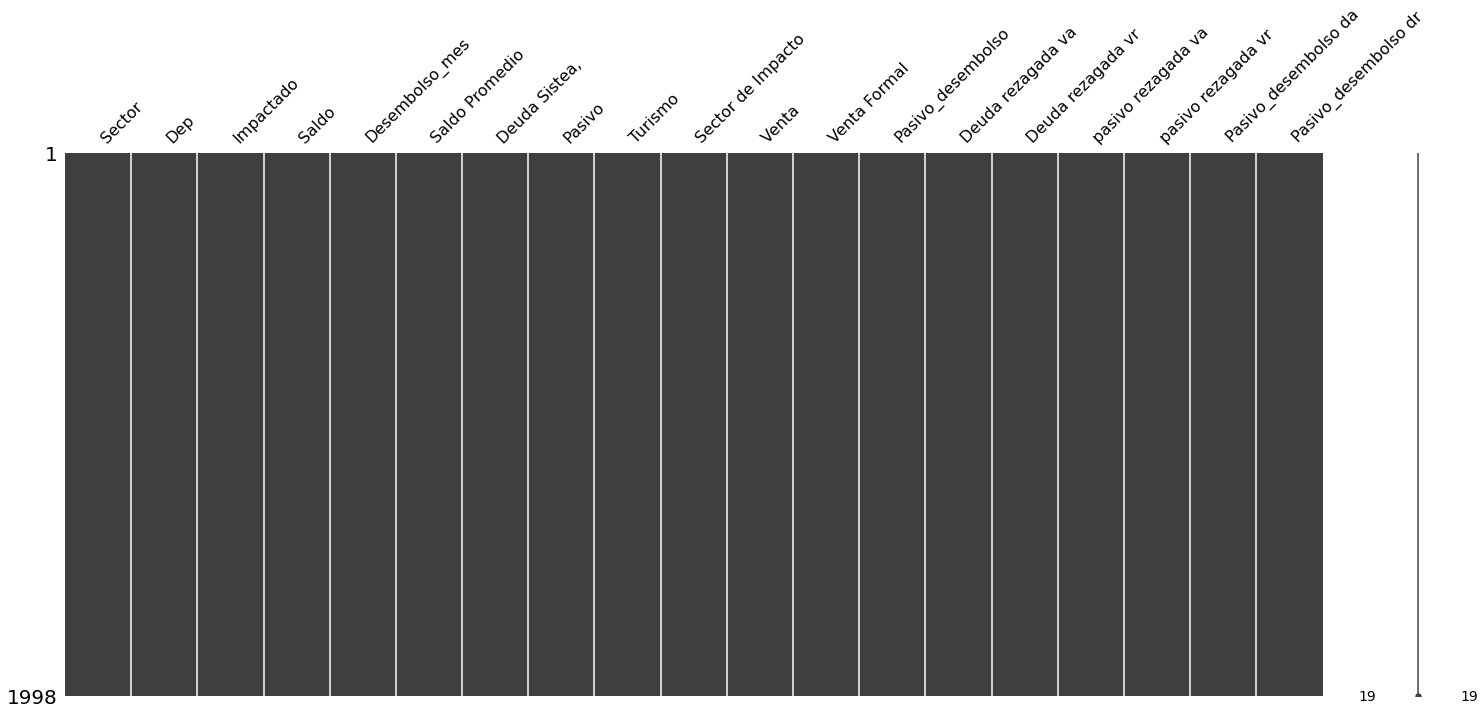

In [9]:
msno.matrix(df)

<AxesSubplot:>

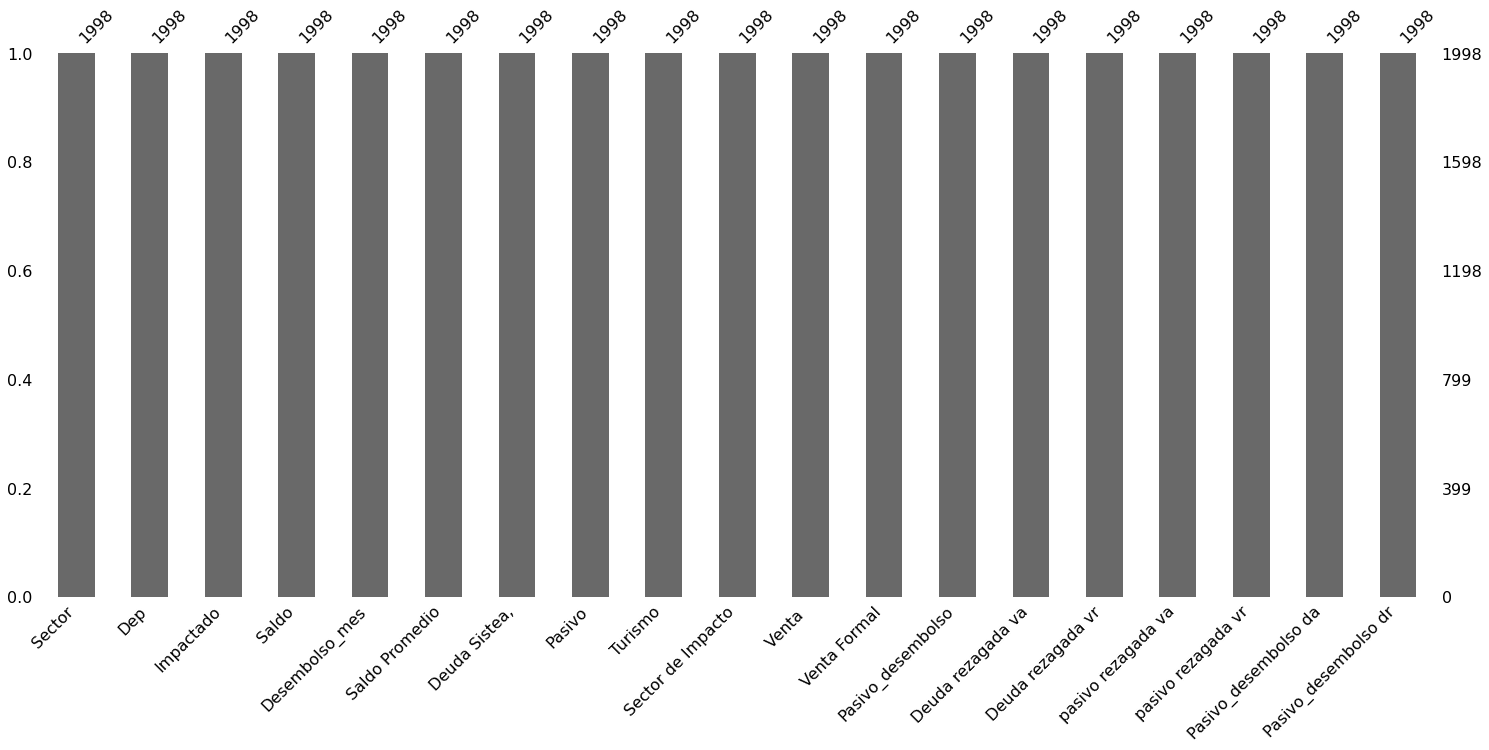

In [4]:
msno.bar(df)

<AxesSubplot:>

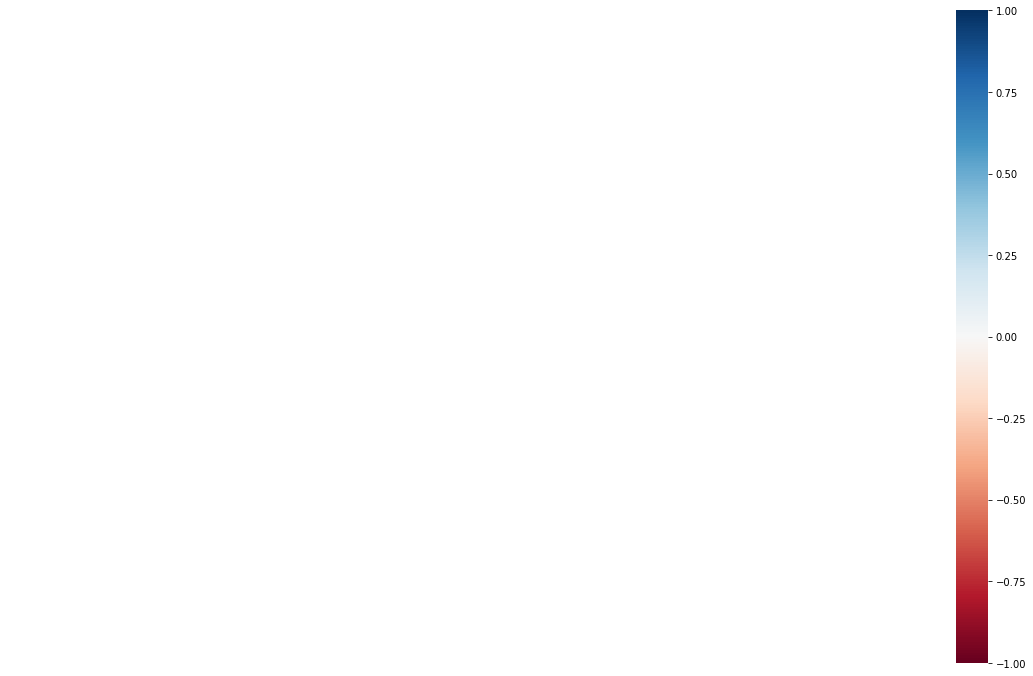

In [14]:
#Matriz de correlaciones entre el numero de missing en cada columna
msno.heatmap(df)

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Ahora tenemos una idea básica sobre los datos. Necesitamos extender eso con algunas visualizaciones. Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Mostraremos algunas gráficas univariadas, es decir, gráficas de cada variable individual. Con estos gráficos tendremos una referencia de los posibles outliers y de la distribución que sigue cada variable. 

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno. Dado que las escalas no son las mismas, puede sugerir algún beneficio al estandarizar los datos para el modelado para alinear todos los medios.

Vamos a eliminar la columna "Dep" ya que posee mucha cardinalidad

In [15]:
df2 = df2.drop(["Dep"], axis = 1)

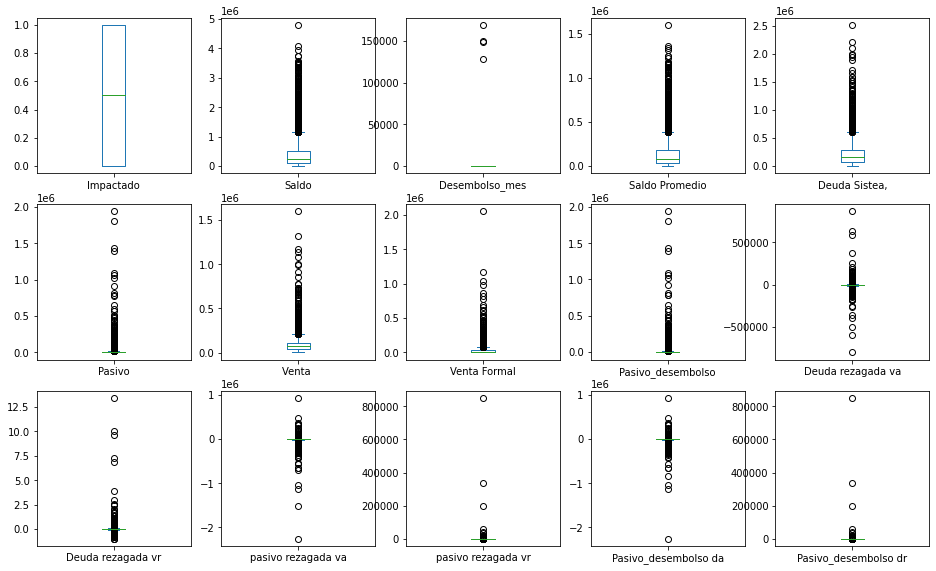

In [16]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
(df2.rename(columns=lambda x: str(x))
        .plot(ax=ax, kind= 'box', subplots=True, layout=(6,5))
)
plt.show()

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>
También podemos crear un histograma de cada variable de entrada para tener una idea de la distribución. Parece que quizás hay variables que tienen una distribución gaussiana. Es útil tener en cuenta que podemos usar algoritmos que pueden explotar esta suposición.

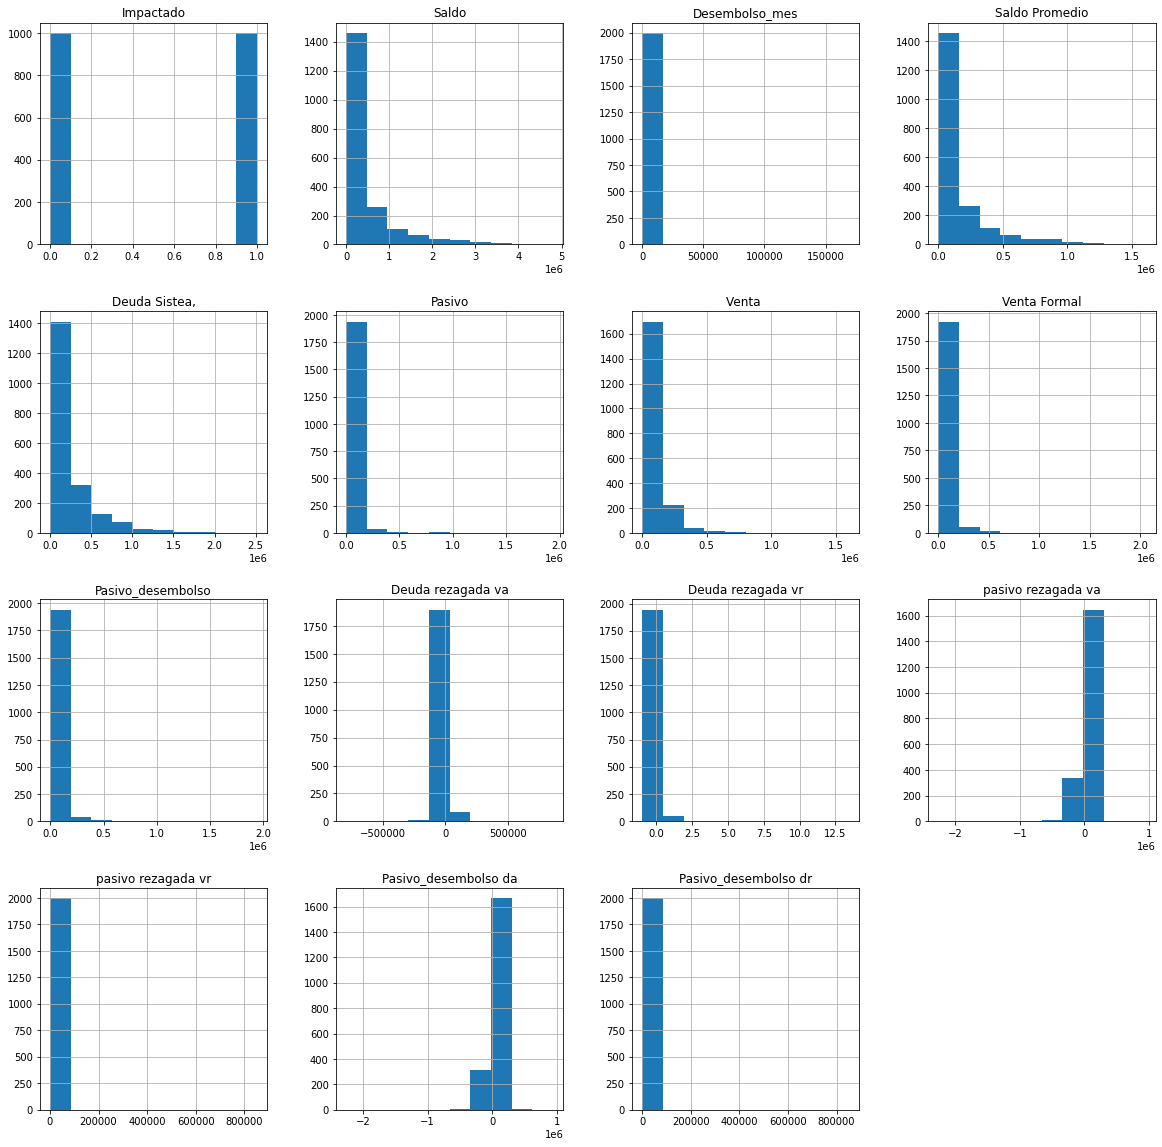

In [17]:
# histograms - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df2.hist(ax=ax)
plt.show()

<a id="section311"></a>
### <font color="#004D7F"> Diagrama de densidad</font>
Esto es útil, puede ver que muchos de los atributos tienen una distribución sesgada. Una transformación de potencia como una transformación de Yeo-johnson que puede corregir el sesgo en las distribuciones podría ser útil.

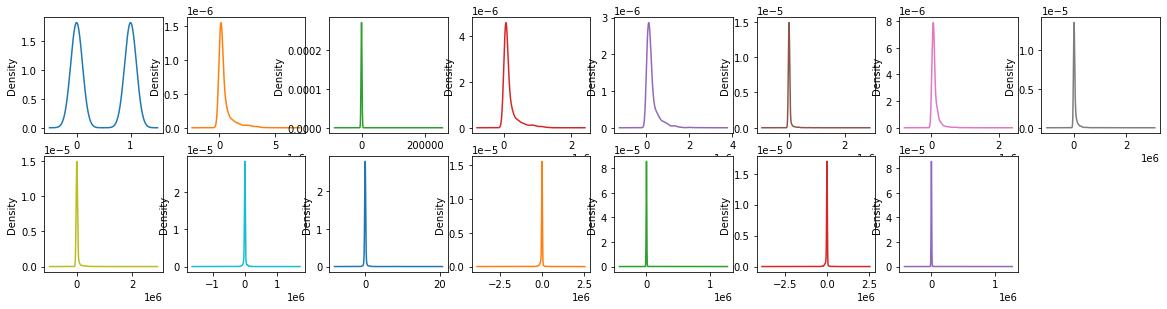

In [18]:
# density
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df2.plot(ax=ax, kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
plt.show()

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Ahora podemos ver las interacciones entre las variables. 

<a id="section321"></a>
### <font color="#004D7F"> Correlación entre atributos</font>
Este gráfico nos permite ver de forma visual la correlación entre los atributos. El amarilo alrededor de la diagonal sugiere que los atributos que están uno al lado del otro generalmente están más correlacionados entre sí. Los parches azules también sugieren una correlación negativa moderada, los atributos adicionales están lejos unos de otros en el orden.<br>
Una buena práctica es tomar el valor de 0.7 o -0.7 entre dos atributos o variables para decir que tienen una fuerte correlación o relación.

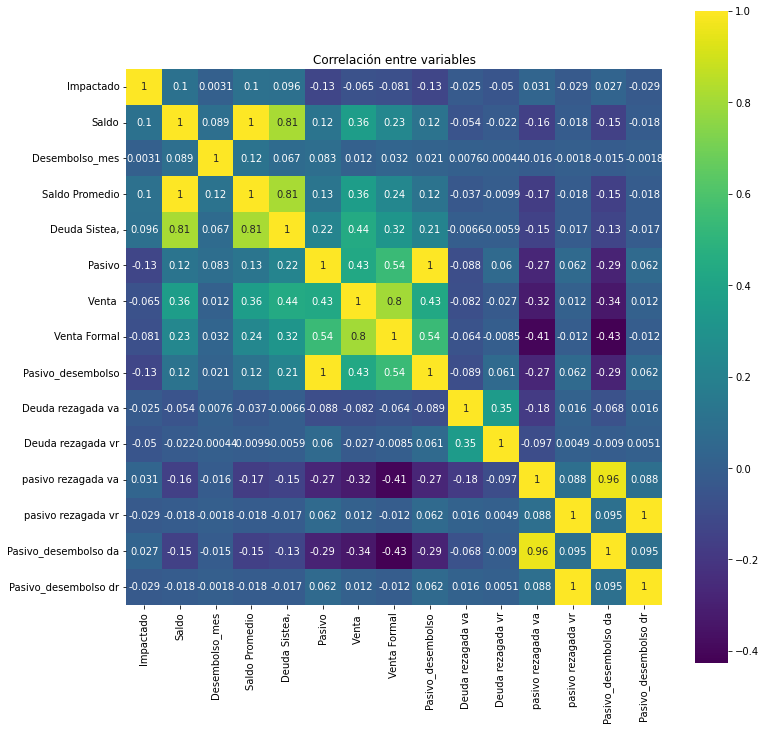

In [19]:
correlation = df2.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
# ----------
plt.title('Correlación entre variables')
plt.show()

Del gráfico se puede apreciar que existen algunas variables muy correlacionadas, las que serán candidatas para eliminar puesto que aportan ruido al modelo<br>
Algunos ejemplos de estas correlaciones, "Saldo" con "Saldo Promedio" y "Deuda Sistema" o "Deuda Sistema" con "Saldo Promedio" y "Saldo" o "Saldo Promedio" con "Deuda Sistema" y "Saldo".<br>
De igual forma las variables pasivo:
* "Pasivo" con "Pasivo_desembolso" o viceversa.<br>
* "Pasivo rezagada va" con "Pasivo_desembolso da" o viceversa.<br>
* "Pasivo_rezagada vr" con "Pasivo_desembolso dr".<br>

"Venta" con "Venta Formal" o viceversa.<br><br>
Vamos a ver otra herramienta para que nos ayude a tomar la decisión de cual eliminar.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Vamos a crear algunos modelos de datos y estimar su Accruacy. Esto es lo que vamos a cubrir en este paso:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Es una buena idea utilizar un conjunto de validación. Esta es una muestra de los datos que retenemos de nuestro análisis y modelado. Lo usamos justo al final de nuestro proyecto para confirmar el Accuracy de nuestro modelo final. Es una prueba que podemos usar para ver si nos equivocamos y para darnos confianza en nuestras estimaciones de Accuracy en datos no etiquetados. Dividiremos el conjunto de datos cargado en dos, el 80% de los cuales utilizaremos para entrenar nuestros modelos y el 20% como un conjunto de datos de validación

In [20]:
# Split-out validation dataset
Y = df2["Impactado"].values
df2 = df2.drop(["Impactado"], axis = 1 )
X = df2.values

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Ahora tiene datos de entrenamiento en `X_train` e `Y_train` para preparar modelos y conjuntos de `X_validation` e `Y_validation` que podemos usar más adelante.

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Evaluación de línea base</font>

Vamos a probar algunos algoritmos a nuestro conjunto de datos. Podemos intuir que algoritmos basados en la distancia como $k$-NN y SVM pueden funcionar bien. Utilizaremos la validación cruzada 10 veces. Evaluaremos algoritmos utilizando la métrica Accuracy ya que las clases estaban balanceadas. Esta es una métrica general que dará una idea rápida de cuán correcto es un modelo dado. Más útil en problemas de clasificación binaria como este.

Para obtener esta línea de base solo se ha eliminado la columna "Dep" y categorizado "Turismo" y "Sector de Impacto", no se ha realizado el tratamiento de los outliers ni normalización u otro tipo de transformación; la línea de base es una referencia sobre la cual nuestro modelo puede predecir.

Posteriormente, creamos una línea base de rendimiento en este problema y verifiquemos varios algoritmos diferentes. Seleccionaremos un conjunto de algoritmos diferentes capaces de trabajar en este problema de clasificación. Los seis algoritmos seleccionados incluyen:
* __Algoritmos lineales:__ LoR y LDA.
* __Algoritmos no lineales:__ CART, SVM, NB, $k$-NN, LGBM y SVM.

In [21]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LGBM', LGBMClassifier()))
models.append(('SVM', SVC()))

Todos los algoritmos usan hiperparámetros predeterminados. Comparemos los algoritmos. Mostraremos la media y la desviación estándar de Accuracy para cada algoritmo a medida que lo calculemos y recopilemos los resultados para su uso posterior.

In [22]:
results = []
names = []
for name, model in models:
    #kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LR: 60.08% (3.49%)
LDA: 57.20% (2.55%)
KNN: 55.82% (3.11%)
CART: 55.44% (5.45%)
NB: 53.19% (3.26%)
LGBM: 58.76% (3.63%)
SVM: 57.20% (3.46%)


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>

Importante: Al parecer hay un bug en "sklearn" y "KFold" pues ahora para kfold = KFold(n_splits=num_folds, random_state=seed), exige random_state = None y shuffle = False, en caso que se quiera cambiar la semilla nos da error; por eso solo puse el nro de kflods
</div>

Estos son solo valores medios de Accuracy, sin completar el tratamiento a los datos. También vamos a  observar la distribución de los valores de Accuracy calculados en los _folds_ de validación cruzada. Podemos hacerlo gráficamente usando Boxplot.

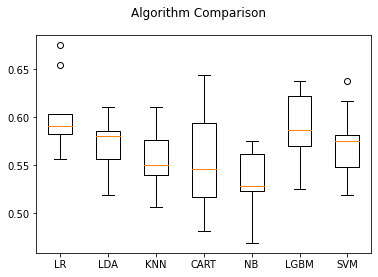

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados muestran que la Regresión Logística nos da un mayor accuracy seguido de LGBM, SVM y LDA(con menor desviación estándar que SVM), lo que sugiere una baja variación. NB, el que tiene peor resultado.

Es posible que la distribución variada de los atributos tenga un efecto en el Accuracy de algoritmos como SVM. En la siguiente sección, repetiremos esta comprobación realizando una estandarización del conjunto de datos de entrenamiento.

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización</font>

Sospechamos que las diferentes distribuciones de los datos en bruto pueden estar afectando negativamente a la habilidad de algunos de los algoritmos. Vamos a evaluar los mismos algoritmos con una copia estandarizada del conjunto de datos. Aquí es donde los datos se transforman de manera que cada atributo tenga un valor medio de cero y una desviación estándar de uno. 

También debemos evitar la fuga de datos cuando transformamos los datos. Una buena manera de evitar fugas es usar Pipelines que estandaricen los datos y construyan el modelo para cada _fold_ de la validación cruzada. De esa forma podemos obtener una estimación justa de cómo cada modelo con datos estandarizados podría funcionar en datos no vistos.

In [24]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLoR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledLGBM', Pipeline([('Scaler', StandardScaler()),('LGBM', LGBMClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

ScaledLoR: 59.77% (4.23%)
ScaledLDA: 57.20% (2.55%)
Scaledk-NN: 55.82% (2.58%)
ScaledCART: 56.07% (4.52%)
ScaledNB: 53.25% (3.31%)
ScaledLGBM: 59.27% (3.85%)
ScaledSVM: 59.52% (4.75%)


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>

Importante: Al parecer hay un bug en "sklearn" y "KFold" o una configuración diferente pues ahora para kfold = KFold(n_splits=num_folds, random_state=seed), exige random_state = None y shuffle = False, en caso que se quiera cambiar la semilla nos da error; por eso solo puse el nro de kflods
</div>

Ejecutar el ejemplo proporciona los resultados enumerados a continuación. Podemos ver que SVM aumentó su accuracy, aunque la desviación estandar es algo mayor que el resto de algoritmos, esto puede deberse a los outliers ya que todavía no hemos terminado el preprocesamiento de los datos; pero nos damos cuenta que mejora el accuracy con standarizar.

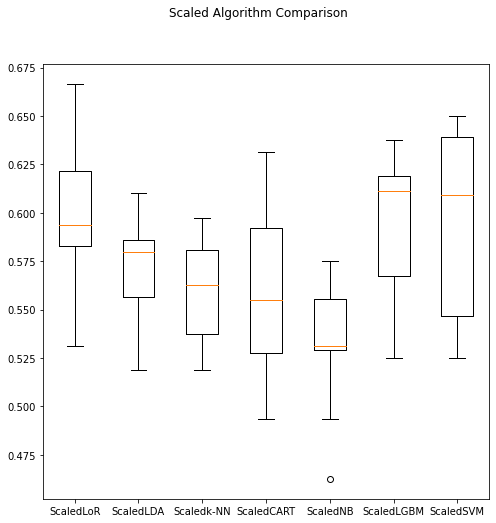

In [25]:
# Compare Algorithms
#fig = plt.figure()
#plt.figure(figsize=(8,8))
fig = plt.figure(figsize = (8,8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados sugieren profundizar en el algoritmo SVM. Es muy probable que una configuración más allá de la predeterminada pueda mejorar el desempeño del modelo.

<a id="section44"></a>
## <font color="#004D7F"> 4.4. Feature Selection</font>

En esta sección veremos las variables más importantes de nuestro modelo, es decir, las que aportan mayor datos para nuestro modelo.
Luego del respectivo análisis se verá cuáles o cuál se va a eliminar.<br>
Nos vamos a apoyar en las siguientes técnicas:
* Matriz de Correlación de Variables.
* Ranking de Importancia.
* Gini de variables.

<a id="section441"></a>
### <font color="#004D7F">4.4.1 Matriz de Correlación de Variables</font>
Esta herramienta fue desarrollada anteriormente en el ítem 3.2 por lo que mostraremos el gráfico y las conclusiones.

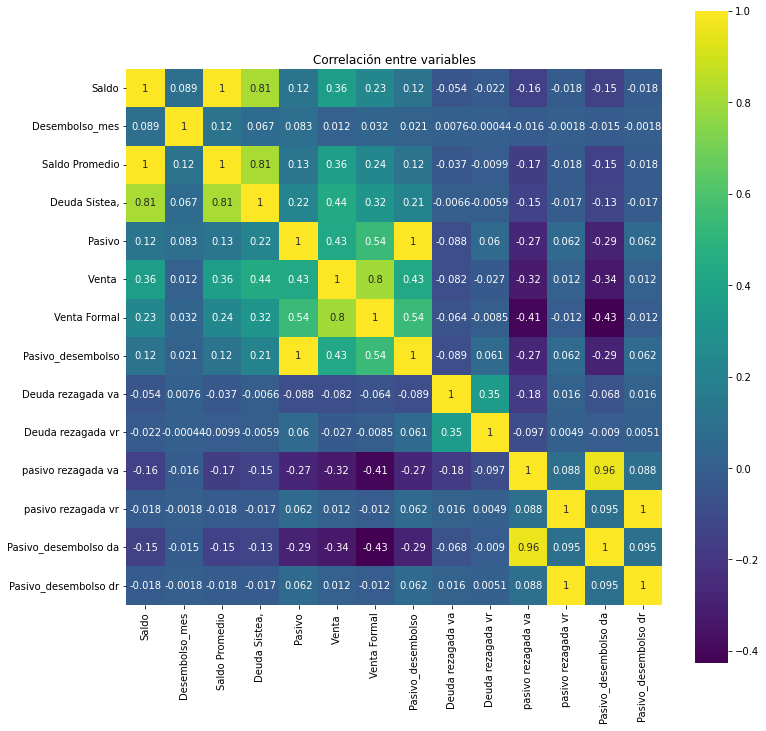

In [26]:
correlation = df2.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
# ----------
plt.title('Correlación entre variables')
plt.show()

Del gráfico se puede apreciar que existen algunas variables muy correlacionadas, las que serán candidatas para eliminar puesto que aportan ruido al modelo<br>
Algunos ejemplos de estas correlacionesson:
* "Saldo" con "Saldo Promedio" o viceversa.
* "Saldo" con "Deuda Sistema" o viceversa.
* "Deuda Sistema" con "Saldo Promedio" o viceversa.
* "Pasivo" con "Pasivo_desembolso" o viceversa.<br>
* "Pasivo rezagada va" con "Pasivo_desembolso da" o viceversa.<br>
* "Pasivo_rezagada vr" con "Pasivo_desembolso dr".
* "Venta" con "Venta Formal" o viceversa.<br><br>

<a id="section442"></a>
### <font color="#004D7F">4.4.2 Ranking de Importancia de Variables</font>
Esta herramienta nos permite tener una noción gráfica del peso de las variables, para tal fin utilizaremos el algoritmo Random Forest.

Accuracy: 0.615 
Index(['Desembolso_mes', 'Turismo', 'Sector', 'Sector de Impacto', 'pasivo rezagada vr',
       'Pasivo_desembolso dr', 'pasivo rezagada va', 'Pasivo_desembolso da', 'Pasivo_desembolso',
       'Venta Formal', 'Pasivo', 'Deuda rezagada vr', 'Deuda rezagada va', 'Saldo Promedio',
       'Saldo', 'Deuda Sistea,', 'Venta '],
      dtype='object')


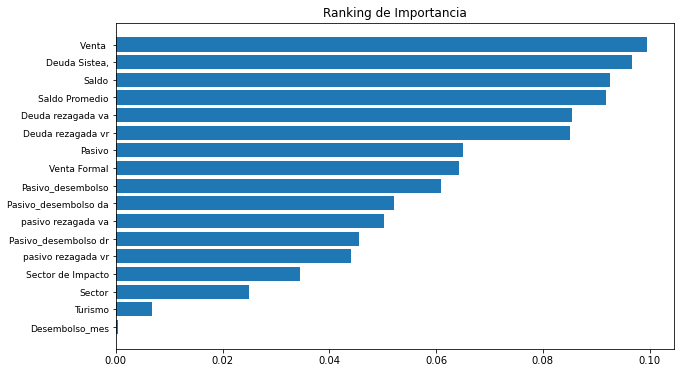

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=7)
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_
Y_pred = forest.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test,Y_pred)} ")
ranking = np.argsort(forest.feature_importances_)
#print(df.feature_names[ranking])
print(df2.columns[ranking])

plt.figure(figsize=(10,6))
plt.title("Ranking de Importancia")
plt.barh(range(X.shape[1]), importances[ranking])
#plt.yticks(range(X.shape[1]), df.feature_names[ranking], fontsize = 9)
plt.yticks(range(X.shape[1]), df2.columns[ranking], fontsize = 9)
plt.show()

Del gráfico podemos apreciar que "Venta", "Deuda Sistea,"y "Saldo Promedio" son los más importantes, mientras que "Desembolso_mes" es la que menos aporta por lo que es la primera candidata a ser eliminada.<br>

<a id="section443"></a>
### <font color="#004D7F">4.4.3 Gini de Variables</font>
Esta herramienta nos permite conocer la importancia de las variables en forma numérica. Para el cálculo utilizaremos el algoritmo de Random Forest.

Vamos a separar las variables continuas de las variables categóricas ya que su cálculo es diferente.

In [28]:
col_ncat = ['Saldo', 'Pasivo', 'pasivo rezagada va',
       'Pasivo_desembolso da', 'pasivo rezagada vr', 'Pasivo_desembolso dr','Deuda rezagada vr',
       'Venta Formal', 'Deuda Sistea,', 'Venta ', 'Deuda rezagada va',
       'Pasivo_desembolso', 'Desembolso_mes', 'Saldo Promedio']
col_cat = ['Sector', 'Turismo', 'Sector de Impacto']

In [29]:
## Función para calcular el GINI en variables continuas
def gini_continuo(data,arr_col,target):
    from sklearn.metrics import roc_auc_score
    from sklearn.ensemble import RandomForestClassifier
    logi=RandomForestClassifier() # Generando objeto
    l_col = []
    l_g = []
    for i in arr_col:
        #print(i)
        bgini=data.loc[:,[i]] # Generando base con variable
        logi.fit(bgini,data[target]) # Entrenamiento
        gini=2*roc_auc_score(data[target],logi.predict_proba(bgini)[:,1])-1
        l_col.append(i)
        l_g.append(gini)
    
    result = pd.DataFrame([l_g],columns=arr_col)
    #result = result.transpose()
    result = pd.melt(result)
    #result.sort_values(,ascending=False)
    result.columns = ["Variable","Gini"]
    result.sort_values("Gini",ascending=False)
    #print(l_g)
    return result

In [30]:
### Gini para vaiables categóricas
def gini_categorico(input_1,variable,target):
    base=input_1.loc[:,[variable]]
    cat_dummies = pd.get_dummies(base[variable], prefix=variable)
    base = base.join(cat_dummies)
    d_vars = base.columns.values.tolist()
    to_keep = [v for v in d_vars if v not in col_cat]
    base=base[to_keep]
    logi=RandomForestClassifier() # Generando objeto
    logi.fit(base,input_1[target]) # Entrenamiento
    gini=2*roc_auc_score(input_1[target],logi.predict_proba(base)[:,1])-1 
    result = pd.DataFrame(columns=['Variable','Gini'])
    result.loc[len(result)]=[variable,gini] 
    return(result)

In [31]:
df2["Impactado"] = df["Impactado"]
data = (gini_continuo(df2,col_ncat,"Impactado"))
data.sort_values('Gini',ascending=False)

,Variable,Gini
13,Saldo Promedio,0.990
0,Saldo,0.989
8,"Deuda Sistea,",0.988
10,Deuda rezagada va,0.986
6,Deuda rezagada vr,0.985
9,Venta,0.932
3,Pasivo_desembolso da,0.860
2,pasivo rezagada va,0.860
5,Pasivo_desembolso dr,0.839
4,pasivo rezagada vr,0.839


In [32]:
## Para las variables categóricas
result_f2 = pd.DataFrame(columns=['Variable','Gini'])
for i in col_cat:
    A=gini_categorico(df2,i,"Impactado")
    result_f2.loc[len(result_f2)]=[A.loc[0].values[0],A.loc[0].values[1]]
    result_f2 = result_f2.sort_values('Gini',ascending=False)
result_f2

,Variable,Gini
2,Sector de Impacto,0.116
0,Sector,0.087
1,Turismo,0.034


Al evaluar las variables categóricas se pueden ver que son menos importantes para el modelo.<br>
"Turismo" y "Sector" son candidatas a eliminar. <br><b>Conservaremos "Sector de Impacto" para fines didácticos(asumiendo que el negocio nos da esa indicación), aunque podría eliminarse también</b>.

De acuerdo a lo mostrado en la Matriz de Correlación, el Ranking de Importancias y los Valores Gini se eliminarán las siguientes variables continuas:
* Saldo
* Pasivo_desembolso
* Pasivo_desembolso da
* pasivo rezagada vr
* Venta formal
* Desembolso_mes(el aporte al modelo es muy bajo)
<br><br>
También eliminaremos las siguientes variables categóricas:
* Turismo
* Sector; por ser las que menos aportan al modelo.

### Depurando el dataset

In [33]:
df2 = df2.drop(["Saldo","Pasivo_desembolso","Pasivo_desembolso da","pasivo rezagada vr",
                "Venta Formal","Desembolso_mes","Turismo","Sector"], axis = 1)
df2

,Saldo Promedio,"Deuda Sistea,",Pasivo,Sector de Impacto,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr,Impactado
0,28321.550,31365.73,5876.82,3,108400.0,-800.65,-0.025,830.82,0.165,0
1,63437.998,64864.99,4467.40,4,105300.0,-2810.52,-0.042,-7043.43,-0.612,0
2,182533.858,200239.32,5000.92,1,86600.0,653.68,0.003,2000.92,0.667,0
3,94638.069,112945.17,325.50,3,103000.0,14820.77,0.151,-17128.30,-0.981,0
4,47432.146,144877.21,0.00,4,172920.0,17468.60,0.137,-2071.80,-1.000,0
...,...,...,...,...,...,...,...,...,...,...
1993,1441.950,1624.47,2558.31,4,30000.0,-710.56,-0.304,-3174.29,-0.543,1
1994,31550.209,75502.84,3029.48,4,32100.0,-5421.28,-0.067,-10965.03,-0.784,1
1995,249193.112,843972.49,593.99,3,180905.0,6776.19,0.008,-11589.60,-0.951,1
1996,6025.994,122633.10,5312.64,3,69500.0,-3838.01,-0.030,-18929.55,-0.781,1


<a id="section45"></a>
## <font color="#004D7F"> 4.5. Tratamiento de Outliers y Depuración de Variables</font>

Para completar el preprocesamiento de los datos vamos a procesar los outliers, primero los identificamos y luego les impiutaremos las cotas superior e inferior.

Presentación Visual de Outliers.<br>
Para este fin utilizaremos los gráficos de Box Plot o gráfico de bigotes

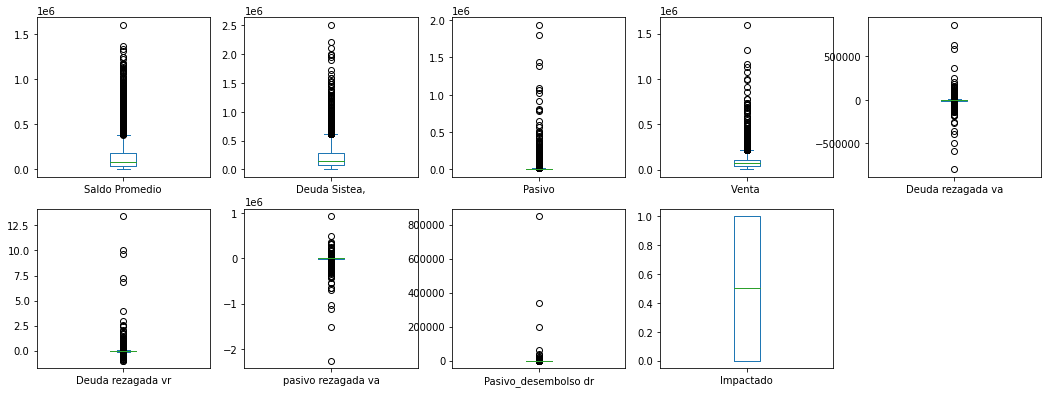

In [34]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (18,17))
ax = fig.gca()
df2.plot(ax=ax, kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

Del gráfico podemos apreciar la existencia de Outliers en las varaibles de nuestro dataset.<br>
Vamos a utilizar dos métodos para identificar los outliers:<br>
* Rango Intercuartílico.
* Puntuazión Z.

<a id="section451"></a>
### <font color="#004D7F">4.5.1 Rango Intercuartílico</font>
Esta herramienta nos permite conocer los valores que están fuera de nuestros cuartiles.

In [35]:
## LAS columnas de nuestro dataset
df2.columns

Index(['Saldo Promedio', 'Deuda Sistea,', 'Pasivo', 'Sector de Impacto', 'Venta ',
       'Deuda rezagada va', 'Deuda rezagada vr', 'pasivo rezagada va', 'Pasivo_desembolso dr',
       'Impactado'],
      dtype='object')

In [36]:
## Las columnas con las cuales vamos a trabajar
var_col = ['Saldo Promedio', 'Deuda Sistea,', 'Pasivo', #'Sector de Impacto',
       'Venta ', 'Deuda rezagada va', 'Deuda rezagada vr',
       'pasivo rezagada va', 'Pasivo_desembolso dr']

## Utilizaremos otro dataset para procesar los datos
df3 = df2

In [37]:
for i in var_col:
    #print(i)
    iqr = df3[i].quantile(0.75) - df3[i].quantile(0.25)
    df3[i+"_flg_out"]=(df3[i]< np.percentile(df3[i], 25)-1.5*iqr) | (df3[i]> np.percentile(df3[i], 75)+1.5*iqr)
    ##Estas columnas son para saber si son outliers inferiores o superiores
    df3[i+"_lim_inf"] = ( df3[i]< np.percentile(df3[i], 25)-1.5*iqr ) 
    df3[i+"_lim_sup"] = ( df3[i]> np.percentile(df3[i], 75)+1.5*iqr )
    #print(iqr)5

In [38]:
###El Dataset con las variables creadas
df3

,Saldo Promedio,"Deuda Sistea,",Pasivo,Sector de Impacto,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr,Impactado,...,Deuda rezagada va_lim_sup,Deuda rezagada vr_flg_out,Deuda rezagada vr_lim_inf,Deuda rezagada vr_lim_sup,pasivo rezagada va_flg_out,pasivo rezagada va_lim_inf,pasivo rezagada va_lim_sup,Pasivo_desembolso dr_flg_out,Pasivo_desembolso dr_lim_inf,Pasivo_desembolso dr_lim_sup
0,28321.550,31365.73,5876.82,3,108400.0,-800.65,-0.025,830.82,0.165,0,...,False,False,False,False,False,False,False,False,False,False
1,63437.998,64864.99,4467.40,4,105300.0,-2810.52,-0.042,-7043.43,-0.612,0,...,False,False,False,False,False,False,False,False,False,False
2,182533.858,200239.32,5000.92,1,86600.0,653.68,0.003,2000.92,0.667,0,...,False,False,False,False,False,False,False,True,False,True
3,94638.069,112945.17,325.50,3,103000.0,14820.77,0.151,-17128.30,-0.981,0,...,True,True,False,True,False,False,False,False,False,False
4,47432.146,144877.21,0.00,4,172920.0,17468.60,0.137,-2071.80,-1.000,0,...,True,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1441.950,1624.47,2558.31,4,30000.0,-710.56,-0.304,-3174.29,-0.543,1,...,False,True,True,False,False,False,False,False,False,False
1994,31550.209,75502.84,3029.48,4,32100.0,-5421.28,-0.067,-10965.03,-0.784,1,...,False,False,False,False,False,False,False,False,False,False
1995,249193.112,843972.49,593.99,3,180905.0,6776.19,0.008,-11589.60,-0.951,1,...,False,False,False,False,False,False,False,False,False,False
1996,6025.994,122633.10,5312.64,3,69500.0,-3838.01,-0.030,-18929.55,-0.781,1,...,False,False,False,False,False,False,False,False,False,False


<a id="section452"></a>
### <font color="#004D7F">4.5.2 Puntuación Z</font>
Esta herramienta también nos permite conocer los valores que están fuera de nuestros cuartiles.

In [39]:
for i in var_col:
    p1=preprocessing.scale(df3[i])
    df3[i+"_flg_out2"]=abs(p1)>2
    

#### Apreciaremos como va quedando nuestro dataset
df3

,Saldo Promedio,"Deuda Sistea,",Pasivo,Sector de Impacto,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr,Impactado,...,Pasivo_desembolso dr_lim_inf,Pasivo_desembolso dr_lim_sup,Saldo Promedio_flg_out2,"Deuda Sistea,_flg_out2",Pasivo_flg_out2,Venta _flg_out2,Deuda rezagada va_flg_out2,Deuda rezagada vr_flg_out2,pasivo rezagada va_flg_out2,Pasivo_desembolso dr_flg_out2
0,28321.550,31365.73,5876.82,3,108400.0,-800.65,-0.025,830.82,0.165,0,...,False,False,False,False,False,False,False,False,False,False
1,63437.998,64864.99,4467.40,4,105300.0,-2810.52,-0.042,-7043.43,-0.612,0,...,False,False,False,False,False,False,False,False,False,False
2,182533.858,200239.32,5000.92,1,86600.0,653.68,0.003,2000.92,0.667,0,...,False,True,False,False,False,False,False,False,False,False
3,94638.069,112945.17,325.50,3,103000.0,14820.77,0.151,-17128.30,-0.981,0,...,False,False,False,False,False,False,False,False,False,False
4,47432.146,144877.21,0.00,4,172920.0,17468.60,0.137,-2071.80,-1.000,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1441.950,1624.47,2558.31,4,30000.0,-710.56,-0.304,-3174.29,-0.543,1,...,False,False,False,False,False,False,False,False,False,False
1994,31550.209,75502.84,3029.48,4,32100.0,-5421.28,-0.067,-10965.03,-0.784,1,...,False,False,False,False,False,False,False,False,False,False
1995,249193.112,843972.49,593.99,3,180905.0,6776.19,0.008,-11589.60,-0.951,1,...,False,False,False,True,False,False,False,False,False,False
1996,6025.994,122633.10,5312.64,3,69500.0,-3838.01,-0.030,-18929.55,-0.781,1,...,False,False,False,False,False,False,False,False,False,False


Los outliers serán los que cumplan los dos criterios, rango intercuartílico y puntuazión Z; esto por cada variable.

<a id="section453"></a>
### <font color="#004D7F">4.5.3 Imputación de Cotas a Outliers</font>
Con los dos criterios anteriormente descritos ya tenemos identificados a los outliers, en esta sección le imputaremos las cotas 75 y 25 o también puede ser el decil 10 y 90. En este caso imputaremos 75 y 25.

In [40]:
## Columnas a imputar
arr_col = ['Saldo Promedio', 'Deuda Sistea,', 'Pasivo',
       'Venta ', 'Deuda rezagada va', 'Deuda rezagada vr', 'pasivo rezagada va', 'Pasivo_desembolso dr']

In [41]:
for c in arr_col:
    #print(c)
    q75 = df3[c].quantile(0.75)
    #q75 = np.percentile(df3[c],90)
    q25 = df3[c].quantile(0.25)
    #q25 = np.percentile(df3[c],1)
    #Ubicamos a los que complen la condicion de outlier intercuartil y puntuazión Z para la cota superior
    idx = df3[ (df3[c+'_flg_out']==True) & (df3[c+'_flg_out2']==True) & (df3[c+"_lim_sup"]==True) ].index.values
    #print("q75 ",idx)
    #Le imputamos la cota superior
    if(len(idx)>0):
        ## Obtener el nro de la columna
        df3[c] = np.where( (df3[c+'_flg_out']==True) & 
                           (df3[c+'_flg_out2']==True) & (df3[c+"_lim_sup"]==True)  , q75, df3[c])
        #df3.iloc[idx,c] = q75
    #Ubicamos a los que complen la condición de outlier intercuartil y puntuazión Z para la cota inferior
    idx = df3[ (df3[c+'_flg_out']==True) & (df3[c+'_flg_out2']==True) & (df3[c+"_lim_inf"]==True) ].index.values
    #Le imputamos la cota inferior
    if(len(idx)>0):        
        df3[c] = np.where( (df3[c+'_flg_out']==True) & 
                           (df3[c+'_flg_out2']==True) & (df3[c+"_lim_inf"]==True)  , q25, df3[c])
        #df3.iloc[idx,c] = q25

In [42]:
df3

,Saldo Promedio,"Deuda Sistea,",Pasivo,Sector de Impacto,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr,Impactado,...,Pasivo_desembolso dr_lim_inf,Pasivo_desembolso dr_lim_sup,Saldo Promedio_flg_out2,"Deuda Sistea,_flg_out2",Pasivo_flg_out2,Venta _flg_out2,Deuda rezagada va_flg_out2,Deuda rezagada vr_flg_out2,pasivo rezagada va_flg_out2,Pasivo_desembolso dr_flg_out2
0,28321.550,31365.730,5876.82,3,108400.0,-800.65,-0.025,830.82,0.165,0,...,False,False,False,False,False,False,False,False,False,False
1,63437.998,64864.990,4467.40,4,105300.0,-2810.52,-0.042,-7043.43,-0.612,0,...,False,False,False,False,False,False,False,False,False,False
2,182533.858,200239.320,5000.92,1,86600.0,653.68,0.003,2000.92,0.667,0,...,False,True,False,False,False,False,False,False,False,False
3,94638.069,112945.170,325.50,3,103000.0,14820.77,0.151,-17128.30,-0.981,0,...,False,False,False,False,False,False,False,False,False,False
4,47432.146,144877.210,0.00,4,172920.0,17468.60,0.137,-2071.80,-1.000,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1441.950,1624.470,2558.31,4,30000.0,-710.56,-0.304,-3174.29,-0.543,1,...,False,False,False,False,False,False,False,False,False,False
1994,31550.209,75502.840,3029.48,4,32100.0,-5421.28,-0.067,-10965.03,-0.784,1,...,False,False,False,False,False,False,False,False,False,False
1995,249193.112,289898.422,593.99,3,180905.0,6776.19,0.008,-11589.60,-0.951,1,...,False,False,False,True,False,False,False,False,False,False
1996,6025.994,122633.100,5312.64,3,69500.0,-3838.01,-0.030,-18929.55,-0.781,1,...,False,False,False,False,False,False,False,False,False,False


<a id="section454"></a>
### <font color="#004D7F">4.5.4 Creación de Variables Dummy</font>
Debido a que la variable "Sector de Impacto" es categórica aunque tenga valores enteros, por lo que vamos a transformarla en dummy.

In [43]:
## Las columnas a procesar
var_col = ['Saldo Promedio', 'Deuda Sistea,', 'Pasivo', 'Sector de Impacto',
       'Venta ', 'Deuda rezagada va', 'Deuda rezagada vr',
       'pasivo rezagada va', 'Pasivo_desembolso dr']

In [44]:
df4 = df3[var_col]

tc_dummy = pd.get_dummies(df4["Sector de Impacto"], prefix = "si")
df4 = pd.concat([df4,tc_dummy], axis = 1)
df4 = df4.drop(["Sector de Impacto"], axis = 1)
df4

,Saldo Promedio,"Deuda Sistea,",Pasivo,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr,si_1,si_2,si_3,si_4
0,28321.550,31365.730,5876.82,108400.0,-800.65,-0.025,830.82,0.165,0,0,1,0
1,63437.998,64864.990,4467.40,105300.0,-2810.52,-0.042,-7043.43,-0.612,0,0,0,1
2,182533.858,200239.320,5000.92,86600.0,653.68,0.003,2000.92,0.667,1,0,0,0
3,94638.069,112945.170,325.50,103000.0,14820.77,0.151,-17128.30,-0.981,0,0,1,0
4,47432.146,144877.210,0.00,172920.0,17468.60,0.137,-2071.80,-1.000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1441.950,1624.470,2558.31,30000.0,-710.56,-0.304,-3174.29,-0.543,0,0,0,1
1994,31550.209,75502.840,3029.48,32100.0,-5421.28,-0.067,-10965.03,-0.784,0,0,0,1
1995,249193.112,289898.422,593.99,180905.0,6776.19,0.008,-11589.60,-0.951,0,0,1,0
1996,6025.994,122633.100,5312.64,69500.0,-3838.01,-0.030,-18929.55,-0.781,0,0,1,0


Como se aprecia ya tenemos el dataset con las variables dummy que hemos creado.

<a id="section46"></a>
## <font color="#004D7F"> 4.6. Normalización de Variables</font>

Hemos visto que las variables que componen nuestro dataset no tienen la misma escala, por ejemplo, observemos la fila cero del dataset, la columna "Saldo Promedio" tiene una cantidad de 28321.550 y "Deuda rezagada vr" tiene un valor de -0.025; esta situación no es la mejor al momento de hacer las predicciones ya que muchos algoritmos ponderan las cantidades y le darían más importancia a "Saldo Promedio" lo que no sería lo correcto.<br>
Para solucionar este tipo de situaciones se debe normalizar y estandarizar las variables, técnica que se realizará a continuación.

<a id="section461"></a>
### <font color="#004D7F">4.6.1 Normalización Min-Max</font>
Esta técnica nos ayudará a mejorar la distribución de las variables del dataset ajustándolas a una distribución normal.

In [45]:
## Estamos utilizando la técnica de normalizar por MinMaxScaler, o sea normalizar y escalar
df5 = df4[ ["si_1","si_2","si_3","si_4"] ]

df4 = df4[ ['Saldo Promedio', 'Deuda Sistea,', 'Pasivo', 'Venta ',
       'Deuda rezagada va', 'Deuda rezagada vr', 'pasivo rezagada va',
       'Pasivo_desembolso dr'] ]
#scaler = StandardScaler().fit(df4)  
scaler = MinMaxScaler(feature_range=(0, 1))
rescalerx = scaler.fit_transform(df4)

df4 = pd.DataFrame(data=rescalerx, index=df4.index, columns=df4.columns)
df4

,Saldo Promedio,"Deuda Sistea,",Pasivo,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr
0,0.048,0.038,0.025,0.318,0.502,0.462,0.568,2.167e-04
1,0.107,0.079,0.019,0.309,0.491,0.454,0.546,1.979e-04
2,0.307,0.242,0.022,0.253,0.509,0.476,0.572,2.289e-04
3,0.159,0.137,0.001,0.302,0.585,0.546,0.518,1.890e-04
4,0.080,0.175,0.000,0.511,0.599,0.539,0.560,1.885e-04
...,...,...,...,...,...,...,...,...
1993,0.002,0.002,0.011,0.083,0.502,0.330,0.557,1.996e-04
1994,0.053,0.091,0.013,0.090,0.477,0.442,0.535,1.938e-04
1995,0.420,0.351,0.003,0.535,0.542,0.478,0.534,1.897e-04
1996,0.010,0.148,0.023,0.202,0.485,0.460,0.513,1.938e-04


Como se aprecia en la salida del dataset han cambiado las escalas

<a id="section462"></a>
### <font color="#004D7F">4.6.2 Gráfico de Distribución de Variables</font>
Vamos a apreciar la distribución luego de la transformación de los datos a la misma escala.

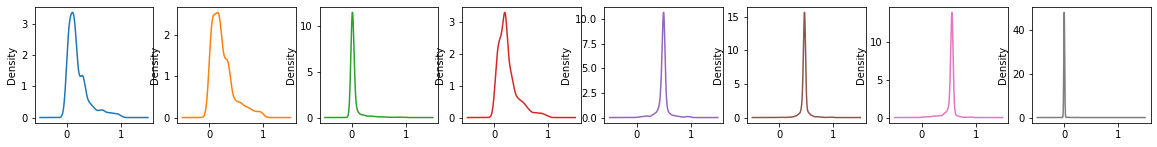

In [46]:
# density
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df4.plot(ax=ax, kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
plt.show()

El gráfico indica que las variables parecen seguir una distribución normal, aunque con algún tipo de sesgo.<br>
Por tanto aplicaremos la transformación de Yeo Johnson para corregir esas deficiencias

<a id="section463"></a>
### <font color="#004D7F">4.6.3 Transformación de Yeo-Johnson</font>
Esta transformación nos ayudará a corregir los sesgos presentes en las variables del dataset tal como se aprecia en el gráfico de densidades; todo esto con la finalidad de mejorar la distribución de nuestras varaibles(que estén más normalizadas) y por ende la predicción del modelo.

In [47]:
features = df4[['Saldo Promedio', 'Deuda Sistea,', 'Pasivo', 'Venta ',
       'Deuda rezagada va', 'Deuda rezagada vr', 'pasivo rezagada va',
       'Pasivo_desembolso dr']]
pt = PowerTransformer(method="yeo-johnson", standardize=True,)
skl_yh = pt.fit(features)
calc_lambdas = skl_yh.lambdas_
skl_yh = pt.transform(features)
df_features = pd.DataFrame(data=skl_yh, columns = df4.columns)
df_features

,Saldo Promedio,"Deuda Sistea,",Pasivo,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr
0,-1.023,-1.328,0.344,0.703,0.128,-0.057,0.331,-0.137
1,-0.364,-0.903,0.088,0.656,0.019,-0.169,0.043,-0.182
2,0.937,0.311,0.189,0.339,0.206,0.131,0.375,-0.108
3,0.089,-0.393,-0.882,0.620,0.968,1.086,-0.306,-0.204
4,-0.642,-0.106,-0.975,1.436,1.110,0.998,0.223,-0.205
...,...,...,...,...,...,...,...,...
1993,-1.670,-1.763,-0.314,-1.098,0.132,-2.033,0.183,-0.178
1994,-0.955,-0.781,-0.208,-1.027,-0.123,-0.342,-0.096,-0.192
1995,1.322,0.827,-0.807,1.501,0.537,0.162,-0.117,-0.202
1996,-1.549,-0.302,0.245,-0.008,-0.037,-0.094,-0.366,-0.192


Ahora veremos gráficamente cómo mejora la distribución de las variables.

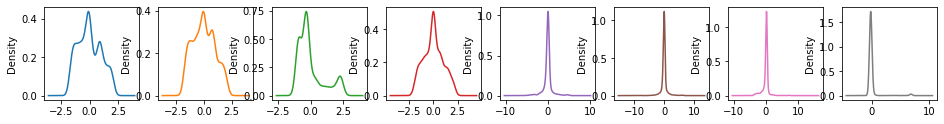

In [48]:
# density
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
df_features.plot(ax=ax, kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
plt.show()

In [49]:
## Juntando los datos con las variables categóricas
df_final = pd.concat([df_features,df5], axis =1)
df_final

,Saldo Promedio,"Deuda Sistea,",Pasivo,Venta,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,Pasivo_desembolso dr,si_1,si_2,si_3,si_4
0,-1.023,-1.328,0.344,0.703,0.128,-0.057,0.331,-0.137,0,0,1,0
1,-0.364,-0.903,0.088,0.656,0.019,-0.169,0.043,-0.182,0,0,0,1
2,0.937,0.311,0.189,0.339,0.206,0.131,0.375,-0.108,1,0,0,0
3,0.089,-0.393,-0.882,0.620,0.968,1.086,-0.306,-0.204,0,0,1,0
4,-0.642,-0.106,-0.975,1.436,1.110,0.998,0.223,-0.205,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1993,-1.670,-1.763,-0.314,-1.098,0.132,-2.033,0.183,-0.178,0,0,0,1
1994,-0.955,-0.781,-0.208,-1.027,-0.123,-0.342,-0.096,-0.192,0,0,0,1
1995,1.322,0.827,-0.807,1.501,0.537,0.162,-0.117,-0.202,0,0,1,0
1996,-1.549,-0.302,0.245,-0.008,-0.037,-0.094,-0.366,-0.192,0,0,1,0


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de Optimización</font>

En esta sección investigamos el ajuste de los parámetros para dos algoritmos que muestran mejores resultados, estos son: SVM .

<a id="section51"></a>
## <font color="#004D7F"> 5.1. Optimización de LGBM</font>

Si bien LGBM no era de los que nos dio mayor accuracy, pero era de los que podíamos tomar y lo estamos optimizando debido a que se puede configurar muchos de sus hiperparámetros
Veremos a continuación cuál es el comportamiento con diferentes hiperparámetros.<br>
Realizaremos un `RandomizedSearchCV` utilizando una validación cruzada de 10 con una copia estandarizada del conjunto de datos de entrenamiento

In [50]:
# Split-out validation dataset
Y = df["Impactado"].values
#df2 = df2.drop(["Impactado"], axis = 1 )
X = df_final.values

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
param = {'boosting_type': ["gbdt","rf","goss","dart"], 
         'n_estimators':[50, 100, 150, 1000],
          'max_depth': [2,4],
          'min_child_samples': [20,50,100,500,1000],
          'n_jobs': [1,2,4]}

num_folds = 10
seed = 4
scoring = "accuracy"

In [51]:
# Tune scaled LGBM
model = LGBMClassifier()
kfold = KFold(n_splits=num_folds)
grid = RandomizedSearchCV(model, param, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best accuracy: 0.612044 using {'n_jobs': 4, 'n_estimators': 150, 'min_child_samples': 20, 'max_depth': 2, 'boosting_type': 'dart'}
{'n_jobs': 4, 'n_estimators': 50, 'min_child_samples': 20, 'max_depth': 4, 'boosting_type': 'goss'}: 57.14% (4.89%)
{'n_jobs': 1, 'n_estimators': 1000, 'min_child_samples': 50, 'max_depth': 4, 'boosting_type': 'dart'}: 58.07% (4.85%)
{'n_jobs': 1, 'n_estimators': 150, 'min_child_samples': 20, 'max_depth': 4, 'boosting_type': 'rf'}: nan% (nan%)
{'n_jobs': 1, 'n_estimators': 50, 'min_child_samples': 20, 'max_depth': 4, 'boosting_type': 'goss'}: 59.64% (4.87%)
{'n_jobs': 1, 'n_estimators': 1000, 'min_child_samples': 20, 'max_depth': 4, 'boosting_type': 'dart'}: 57.32% (4.18%)
{'n_jobs': 1, 'n_estimators': 100, 'min_child_samples': 1000, 'max_depth': 4, 'boosting_type': 'gbdt'}: 49.13% (4.47%)
{'n_jobs': 1, 'n_estimators': 50, 'min_child_samples': 50, 'max_depth': 2, 'boosting_type': 'gbdt'}: 60.33% (5.80%)
{'n_jobs': 4, 'n_estimators': 150, 'min_child_samples'

Podemos ver que la configuración óptima es n_jobs = 4, n_estimators = 150, min:child_samples = 20 y boosting_type = 'dart'. Esto es interesante ya que el algoritmo hará predicciones utilizando la instancia más similar en el conjunto de datos de entrenamiento solo. Para este caso nos dió un Accuracy de 0.6120

<a id="section52"></a>
## <font color="#004D7F"> 5.2. Optimización de SVM</font>

Podemos ajustar dos parámetros clave del algoritmo SVM, el valor de _C_ (cuánto relajar el margen) y el tipo de _kernel_. El valor predeterminado para SVM (la clase SVC) es usar el _kernel_ de la función de base radial _(RBF)_ con un valor de _C_ establecido en 1.0. Realizaremos un `RandomizedSearchCV` utilizando una validación cruzada de 10 con una copia estandarizada del conjunto de datos de entrenamiento. Intentaremos una serie de tipos de _kernel_ más simples y valores de _C_ con menos sesgo y más sesgo (menor que y más de 1.0 respectivamente).

In [52]:
# Split-out validation dataset
Y = df["Impactado"].values
#df2 = df2.drop(["Impactado"], axis = 1 )
X = df_final.values

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10
seed = 4
scoring = 'accuracy'

In [53]:
# Tune scaled SVM
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
#kfold = KFold(n_splits=num_folds, random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = RandomizedSearchCV(model, param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best: 0.601360 using {'kernel': 'linear', 'C': 1.5}
{'kernel': 'sigmoid', 'C': 1.7}: 50.75% (3.06%)
{'kernel': 'rbf', 'C': 1.3}: 59.51% (3.33%)
{'kernel': 'linear', 'C': 0.7}: 60.01% (3.83%)
{'kernel': 'linear', 'C': 0.1}: 59.82% (4.07%)
{'kernel': 'linear', 'C': 1.5}: 60.14% (3.76%)
{'kernel': 'linear', 'C': 0.5}: 59.89% (3.92%)
{'kernel': 'sigmoid', 'C': 1.3}: 50.13% (3.02%)
{'kernel': 'linear', 'C': 0.3}: 59.95% (3.90%)
{'kernel': 'linear', 'C': 2.0}: 60.14% (3.76%)
{'kernel': 'sigmoid', 'C': 0.7}: 51.44% (2.91%)


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>

Importante: Al parecer hay un bug en "sklearn" y "KFold" o una configuración diferente, pues ahora para kfold = KFold(n_splits=num_folds, random_state=seed), exige random_state = None y shuffle = False, en caso que se quiera cambiar la semilla nos da error; por eso solo puse el nro de kflods
</div>

Podemos ver que la configuración más precisa fue SVM con un _kernel linear y un valor _C_ de 1.5. La precisión del 60.1360% es un poco menor de lo que LGBM logró, diríamos que casi nos dan el mismo valor del Accuracy.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section6"></a>
# <font color="#004D7F"> 6. Algoritmos ensamblados</font>

Otra forma en que podemos mejorar el rendimiento de los algoritmos en este problema es mediante el uso de modelos ensamblados. En esta sección evaluaremos cuatro algoritmos ensamblados diferentes, dos tipo Boosting y dos tipo  Bagging:
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

Utilizaresmo una validación cruzada de 10. No se utiliza la estandarización de datos en este caso porque los cuatro algoritmos de conjunto se basan en árboles de decisión que son menos sensibles a las distribuciones de datos.

In [54]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    #kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

AB: 51.44% (2.91%)
GBM: 51.44% (2.91%)
RF: 51.44% (2.91%)
ET: 51.44% (2.91%)


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>

Importante: Al parecer hay un bug en "sklearn" y "KFold" o una configuración diferente, pues ahora para kfold = KFold(n_splits=num_folds, random_state=seed), exige random_state = None y shuffle = False, en caso que se quiera cambiar la semilla nos da error; por eso solo puse el nro de kflods
</div>

Podemos ver que los valores de Accuracy bajos (por debajo de 57% de SVM de la línea base) con configuraciones predeterminadas, por lo que no merecen optimizar; LGBM y SVM nos dan un mejor Accuracy.

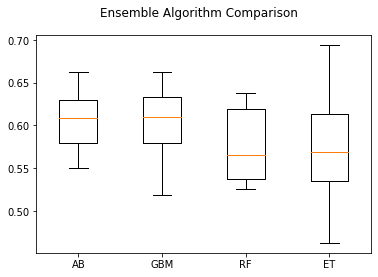

In [55]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados sugieren que podemos utilizar LGBM o SVM para nuestro modelo ya que nos dan casi los mismos resultados del Accuracy.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section7"></a>
# <font color="#004D7F"> 7. Fase de Forecasting</font>

El LGBM mostró el mejor resultado como un modelo estable y de baja complejidad para este problema. En esta sección finalizaremos el modelo entrenándolo en todo el conjunto de datos de entrenamiento y haremos predicciones para el conjunto de datos de validación para confirmar nuestros hallazgos. 

Una parte de los resultados fue que SVM funciona mejor cuando el conjunto de datos está estandarizado, de modo que todos los atributos tienen un valor medio de cero y una desviación estándar de uno. Podemos calcular esto a partir del conjunto de datos de entrenamiento completo y aplicar la misma transformación a los atributos de entrada del conjunto de datos de validación.

In [56]:
# Split-out validation dataset
Y = df["Impactado"].values
#df2 = df2.drop(["Impactado"], axis = 1 )
X = df_final.values

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10
seed = 4
scoring = 'accuracy'

In [57]:
# Finalize Model
# prepare the model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='linear')
model = LGBMClassifier(n_jobs=2, n_estimators= 50, min_child_samples = 20, max_depth = 2, boosting_type = 'gbdt')
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
ValidationX = X_validation #scaler.transform(X_validation)
predictions = model.predict(ValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5875
[[ 97 113]
 [ 52 138]]
              precision    recall  f1-score   support

           0       0.65      0.46      0.54       210
           1       0.55      0.73      0.63       190

    accuracy                           0.59       400
   macro avg       0.60      0.59      0.58       400
weighted avg       0.60      0.59      0.58       400



El accuracy de validación es de <b>58.75%</b>, un poco más bajo que el de entrenamiento de <b>60.95%</b>, aunque están cercanos los valores.<br>
De la Matriz de Confusión apreciamos que de la clase 0 tiene 97 aciertos, de la clase 1, 138.

Con un Threshold de 0.5 calcularemos el accuracy para comprobar que el modelo ya nos da esos datos.

In [58]:
probs = predictions
m=pd.DataFrame(data=probs,columns = ['Probs'])

Y2=pd.DataFrame(Y_validation, columns = ["y"])
Y2['Probs']=m

threshold = 0.5
Y2["prediction"]=np.where(probs>threshold, 1, 0)

conf_matrix = pd.crosstab(Y2.prediction, Y2.y)

In [59]:
TN=conf_matrix[0][0]
TP=conf_matrix[1][1]
FN=conf_matrix[0][1]
FP=conf_matrix[1][0]
final=(TP+TN)/(TN+TP+FN+FP)
final

0.5875

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>